In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

import warnings
warnings.filterwarnings('ignore')

np.random.seed(10)

In [ ]:
# Aquifer_Petrignano.csv
filepath = '/content/drive/MyDrive/Aquifer_Petrignano (1).csv'
df = pd.read_csv(filepath)

In [ ]:
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

Date                                       0
Rainfall_Bastia_Umbra                   1024
Depth_to_Groundwater_P24                  55
Depth_to_Groundwater_P25                  39
Temperature_Bastia_Umbra                1024
Temperature_Petrignano                  1024
Volume_C10_Petrignano                    198
Hydrometry_Fiume_Chiascio_Petrignano    1024
dtype: int64

In [ ]:
df[df['Rainfall_Bastia_Umbra'].notna()].reset_index(drop = True)

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,01/01/2009,0.0,-31.96,-31.14,5.2,4.9,-24530.688,2.4
1,02/01/2009,0.0,-32.03,-31.11,2.3,2.5,-28785.888,2.5
2,03/01/2009,0.0,-31.97,-31.07,4.4,3.9,-25766.208,2.4
3,04/01/2009,0.0,-31.91,-31.05,0.8,0.8,-27919.296,2.4
4,05/01/2009,0.0,-31.94,-31.01,-1.9,-2.1,-29854.656,2.3
...,...,...,...,...,...,...,...,...
4194,26/06/2020,0.0,-25.68,-25.07,25.7,24.5,-29930.688,2.5
4195,27/06/2020,0.0,-25.80,-25.11,26.2,25.0,-31332.960,2.4
4196,28/06/2020,0.0,-25.80,-25.19,26.9,25.7,-32120.928,2.4
4197,29/06/2020,0.0,-25.78,-25.18,26.9,26.0,-30602.880,2.4


In [ ]:
df.describe()

,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
count,4199.000000,5168.000000,5184.000000,4199.000000,4199.000000,5025.000000,4199.000000
mean,1.556633,-26.263723,-25.692926,15.030293,13.739081,-29043.296726,2.372517
std,5.217923,3.319858,3.214165,7.794871,7.701369,4751.864371,0.589088
min,0.000000,-34.470000,-33.710000,-3.700000,-4.200000,-45544.896000,0.000000
25%,0.000000,-28.250000,-27.620000,8.800000,7.700000,-31678.560000,2.100000
50%,0.000000,-25.990000,-25.540000,14.700000,13.500000,-28689.120000,2.400000
75%,0.100000,-23.820000,-23.430000,21.400000,20.000000,-26218.080000,2.700000
max,67.300000,-19.660000,-19.100000,33.000000,31.100000,0.000000,4.100000


In [ ]:
df.tail(100)

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
5123,23/03/2020,0.0,-25.09,-24.95,5.2,4.7,-25949.376,2.5
5124,24/03/2020,1.2,-24.81,-24.79,2.8,2.4,-23393.664,2.5
5125,25/03/2020,2.4,-24.64,-24.66,3.6,2.9,-23150.880,2.5
5126,26/03/2020,0.0,-24.62,-24.62,7.2,6.7,-23510.304,2.5
5127,27/03/2020,0.0,-24.81,-24.67,10.6,10.0,-24760.512,2.8
...,...,...,...,...,...,...,...,...
5218,26/06/2020,0.0,-25.68,-25.07,25.7,24.5,-29930.688,2.5
5219,27/06/2020,0.0,-25.80,-25.11,26.2,25.0,-31332.960,2.4
5220,28/06/2020,0.0,-25.80,-25.19,26.9,25.7,-32120.928,2.4
5221,29/06/2020,0.0,-25.78,-25.18,26.9,26.0,-30602.880,2.4


In [ ]:
df = df.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'], axis = 1)

In [ ]:
df.columns = ['date', 'rainfall', 'depth_to_groundwater', 'temperature', 'drainage_volume', 'river_hydrometry']

In [ ]:
df

,date,rainfall,depth_to_groundwater,temperature,drainage_volume,river_hydrometry
0,14/03/2006,NaN,-22.18,NaN,NaN,NaN
1,15/03/2006,NaN,-22.14,NaN,NaN,NaN
2,16/03/2006,NaN,-22.04,NaN,NaN,NaN
3,17/03/2006,NaN,-22.04,NaN,NaN,NaN
4,18/03/2006,NaN,-22.04,NaN,NaN,NaN
...,...,...,...,...,...,...
5218,26/06/2020,0.0,-25.07,25.7,-29930.688,2.5
5219,27/06/2020,0.0,-25.11,26.2,-31332.960,2.4
5220,28/06/2020,0.0,-25.19,26.9,-32120.928,2.4
5221,29/06/2020,0.0,-25.18,26.9,-30602.880,2.4


In [ ]:
targets = ['depth_to_groundwater']
features = [feature for feature in df.columns if feature not in targets]

targets, features

(['depth_to_groundwater'],
 ['date', 'rainfall', 'temperature', 'drainage_volume', 'river_hydrometry'])

In [ ]:
from datetime import datetime, date
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

df.head()

,date,rainfall,depth_to_groundwater,temperature,drainage_volume,river_hydrometry
0,2006-03-14,NaN,-22.18,NaN,NaN,NaN
1,2006-03-15,NaN,-22.14,NaN,NaN,NaN
2,2006-03-16,NaN,-22.04,NaN,NaN,NaN
3,2006-03-17,NaN,-22.04,NaN,NaN,NaN
4,2006-03-18,NaN,-22.04,NaN,NaN,NaN


## Visualization

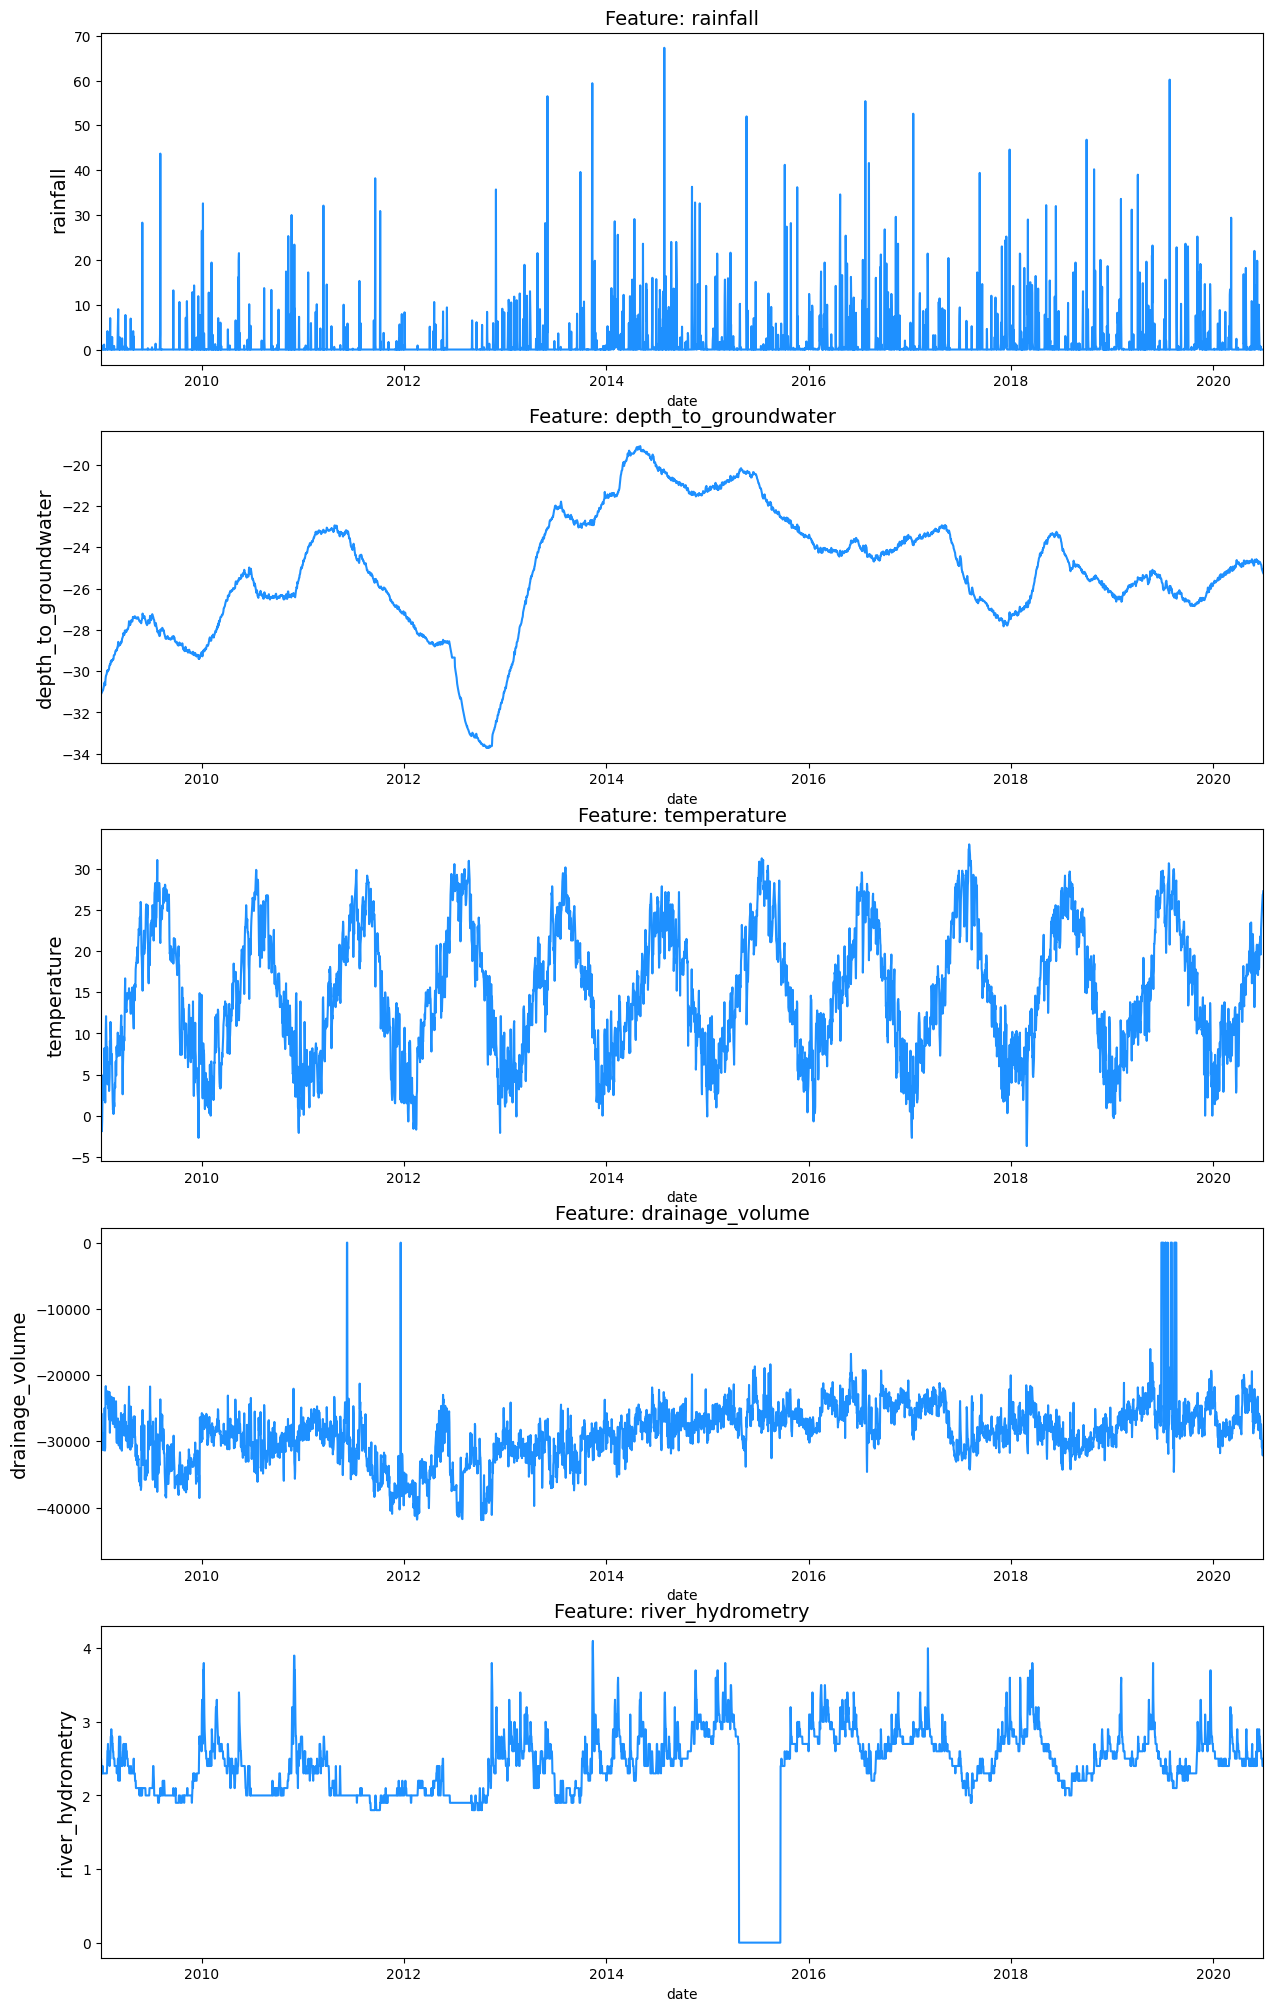

In [ ]:
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 25))
for i, column in enumerate(df.drop('date', axis=1).columns):
    sns.lineplot(x=df['date'], y=df[column].fillna(method='ffill'), ax=ax[i], color='dodgerblue')
    ax[i].set_title('Feature: {}'.format(column), fontsize=14)
    ax[i].set_ylabel(ylabel=column, fontsize=14)
                      
    ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])  

In [ ]:
df.isna().sum()

date                       0
rainfall                1024
depth_to_groundwater      39
temperature             1024
drainage_volume          198
river_hydrometry        1024
dtype: int64

### Plotting a line plot to distinguish between the missing values and filing with np.inf values

(14245.0, 18443.0)

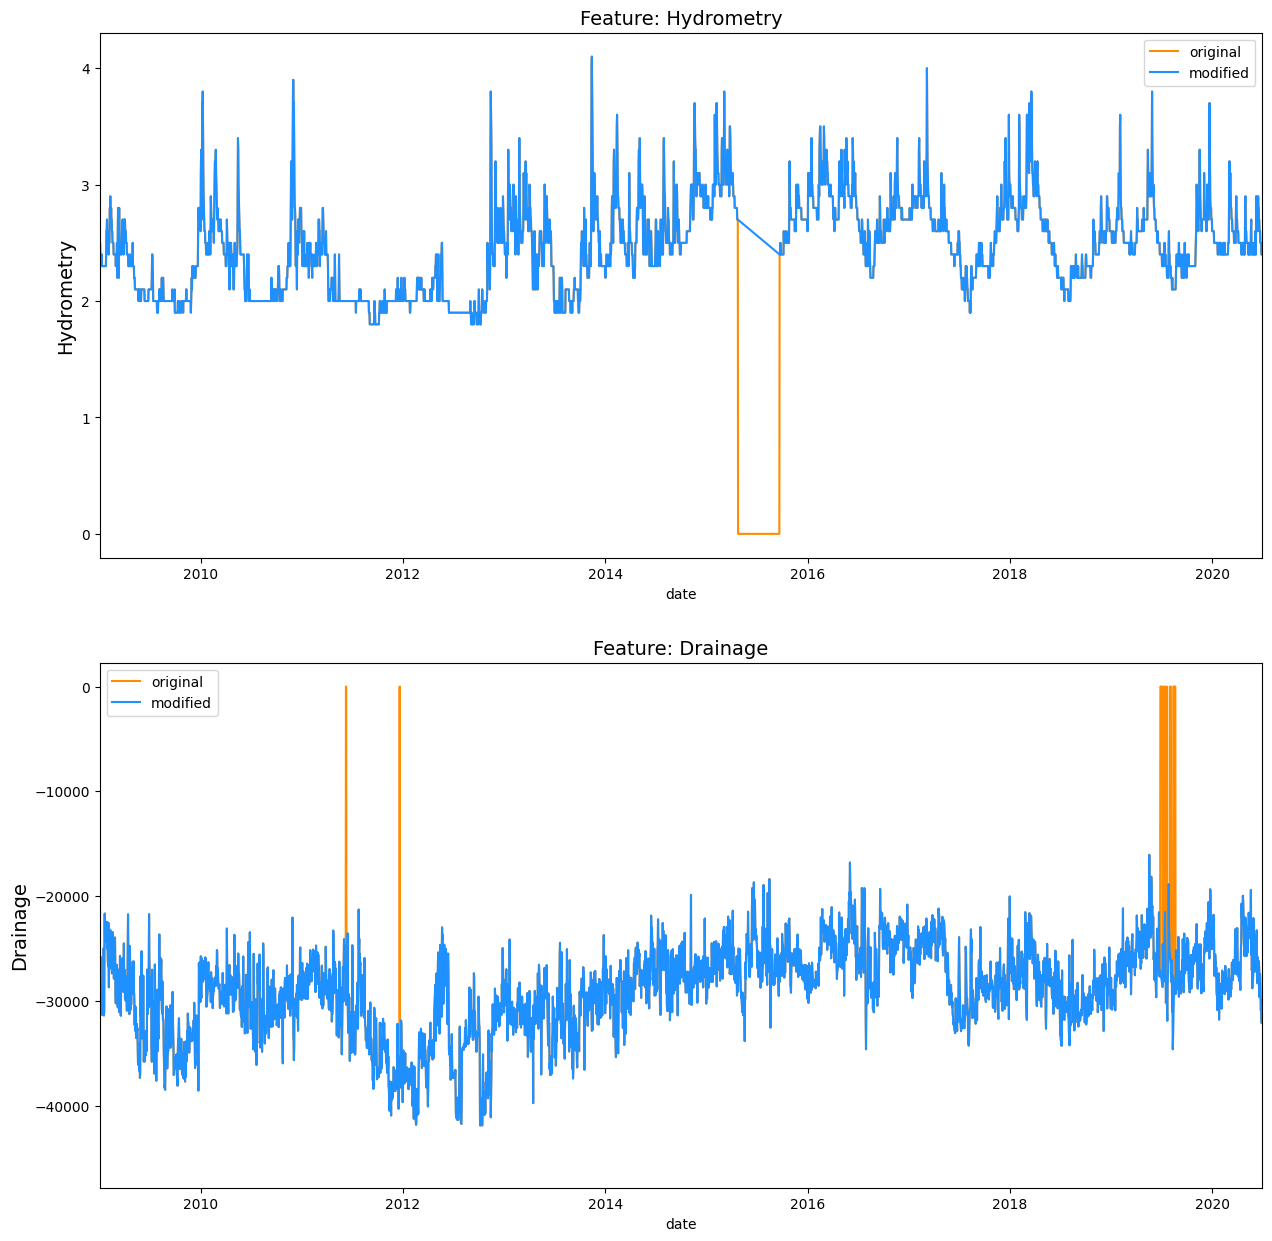

In [ ]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

old_hydrometry = df['river_hydrometry'].copy()
df['river_hydrometry'] = df['river_hydrometry'].replace(0, np.nan)

sns.lineplot(x=df['date'], y=old_hydrometry, ax=ax[0], color='darkorange', label='original')
sns.lineplot(x=df['date'], y=df['river_hydrometry'].fillna(np.inf), ax=ax[0], color='dodgerblue', label='modified')
ax[0].set_title('Feature: Hydrometry', fontsize=14)
ax[0].set_ylabel(ylabel='Hydrometry', fontsize=14)
ax[0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])



old_drainage = df['drainage_volume'].copy()
df['drainage_volume'] = df['drainage_volume'].replace(0, np.nan)

sns.lineplot(x=df['date'], y=old_drainage, ax=ax[1], color='darkorange', label='original')
sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(np.inf), ax=ax[1], color='dodgerblue', label='modified')
ax[1].set_title('Feature: Drainage', fontsize=14)
ax[1].set_ylabel(ylabel='Drainage', fontsize=14)
ax[1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

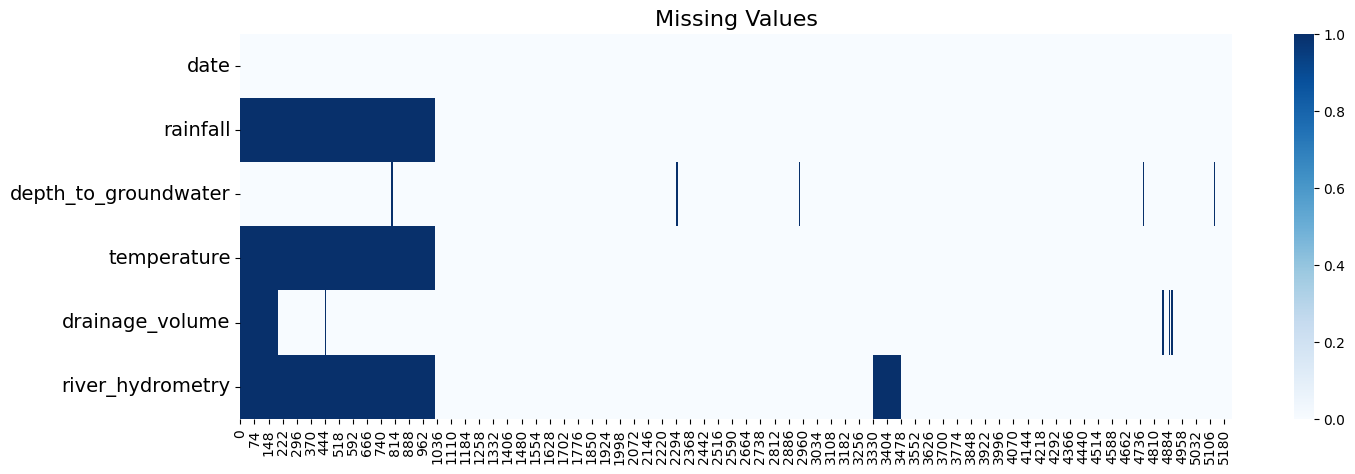

In [ ]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))

sns.heatmap(df.T.isna(), cmap='Blues')
ax.set_title('Missing Values', fontsize=16)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

## Let's check what fills the missing values more accurately

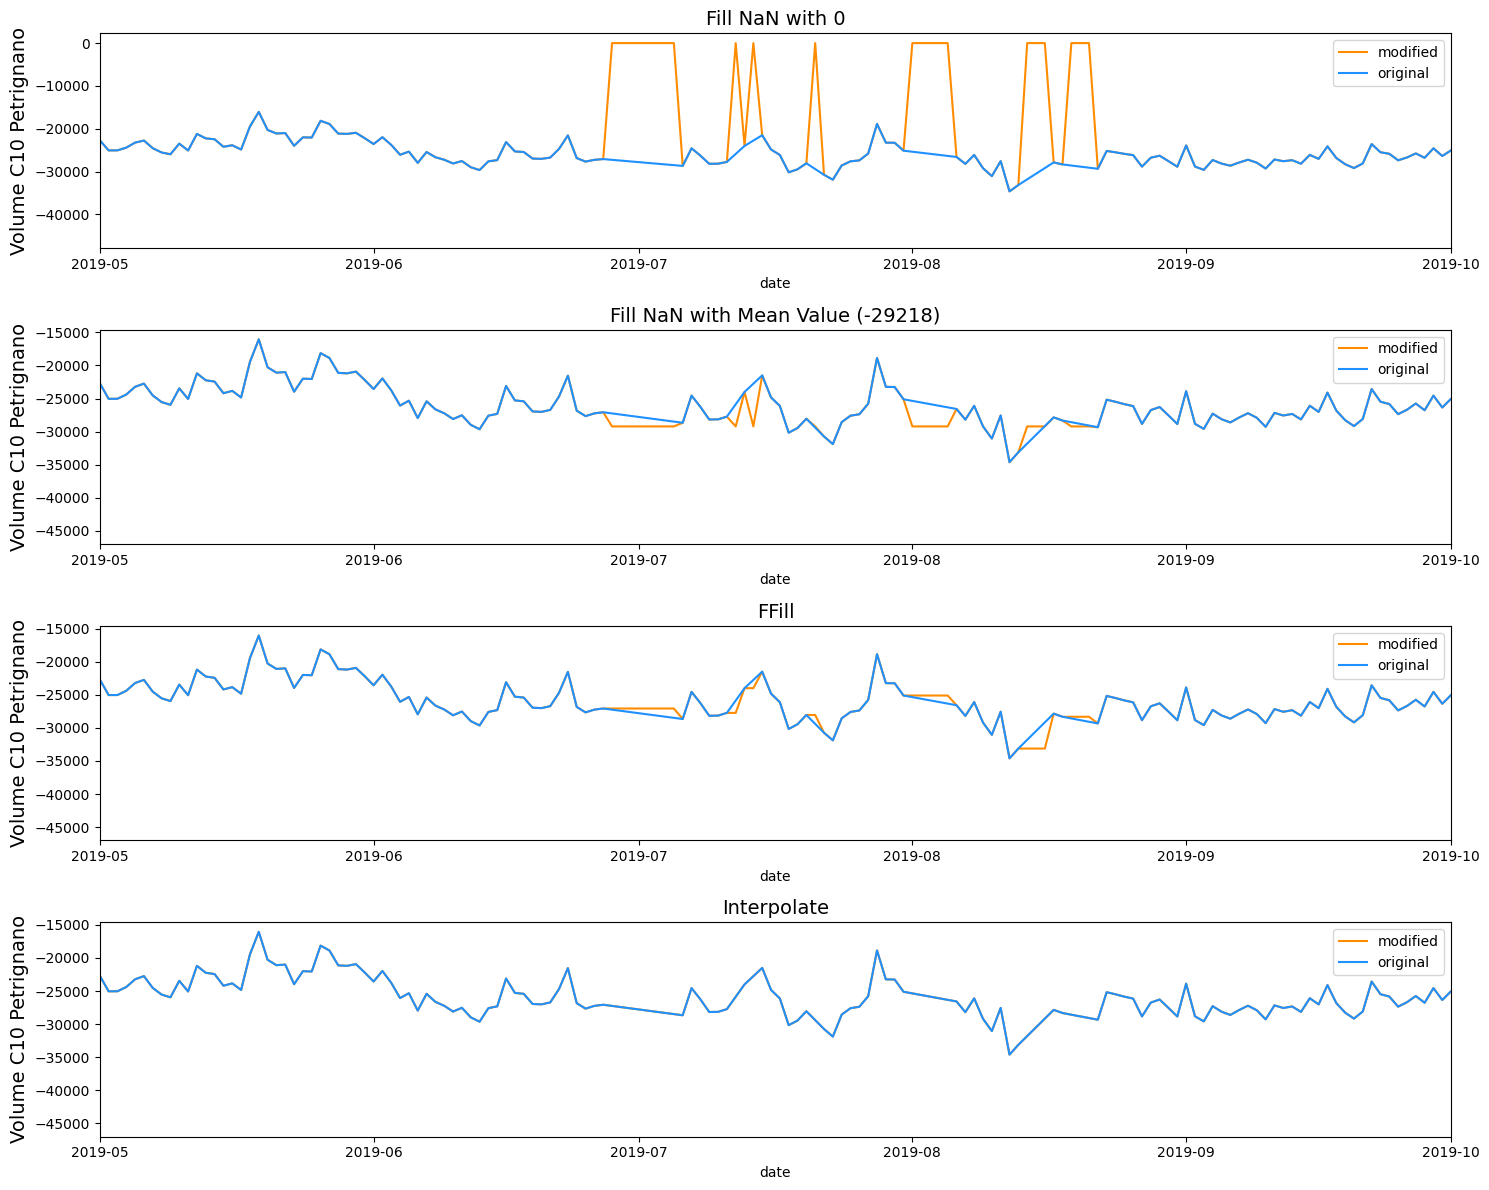

In [ ]:
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 12))

sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(0), ax=ax[0], color='darkorange', label = 'modified')
sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(np.inf), ax=ax[0], color='dodgerblue', label = 'original')
ax[0].set_title('Fill NaN with 0', fontsize=14)
ax[0].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

mean_drainage = df['drainage_volume'].mean()
sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(mean_drainage), ax=ax[1], color='darkorange', label = 'modified')
sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(np.inf), ax=ax[1], color='dodgerblue', label = 'original')
ax[1].set_title(f'Fill NaN with Mean Value ({mean_drainage:.0f})', fontsize=14)
ax[1].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

sns.lineplot(x=df['date'], y=df['drainage_volume'].ffill(), ax=ax[2], color='darkorange', label = 'modified')
sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(np.inf), ax=ax[2], color='dodgerblue', label = 'original')
ax[2].set_title(f'FFill', fontsize=14)
ax[2].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

sns.lineplot(x=df['date'], y=df['drainage_volume'].interpolate(), ax=ax[3], color='darkorange', label = 'modified')
sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(np.inf), ax=ax[3], color='dodgerblue', label = 'original')
ax[3].set_title(f'Interpolate', fontsize=14)
ax[3].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

for i in range(4):
    ax[i].set_xlim([date(2019, 5, 1), date(2019, 10, 1)])
    
plt.tight_layout()
plt.show()

In [ ]:
## SInce interpolate fits as the best option from the data Viz, we will work with it.

df['drainage_volume'] = df['drainage_volume'].interpolate()
df['river_hydrometry'] = df['river_hydrometry'].interpolate()
df['depth_to_groundwater'] = df['depth_to_groundwater'].interpolate()

In [ ]:
df.head()

,date,rainfall,depth_to_groundwater,temperature,drainage_volume,river_hydrometry
0,2006-03-14,NaN,-22.18,NaN,NaN,NaN
1,2006-03-15,NaN,-22.14,NaN,NaN,NaN
2,2006-03-16,NaN,-22.04,NaN,NaN,NaN
3,2006-03-17,NaN,-22.04,NaN,NaN,NaN
4,2006-03-18,NaN,-22.04,NaN,NaN,NaN


## Will perform smoothning of data
* Downsampling is when the frequency of samples is decreased(days to weeks)

In [ ]:
# fig, ax = plt.subplots(ncols=2, nrows=3, sharex=True, figsize=(16,12))

# sns.lineplot(data=df, x='date', y='drainage_volume', color='dodgerblue', ax=ax[0, 0])

# ax[0, 0].set_title('Drainage Volume', fontsize=14)

# resampled_df = df[['date','drainage_volume']].resample('7D', on='date').sum().reset_index(drop=False)
# sns.lineplot(resampled_df['date'], resampled_df['drainage_volume'], color='dodgerblue', ax=ax[1, 0])
# ax[1, 0].set_title('Weekly Drainage Volume', fontsize=14)

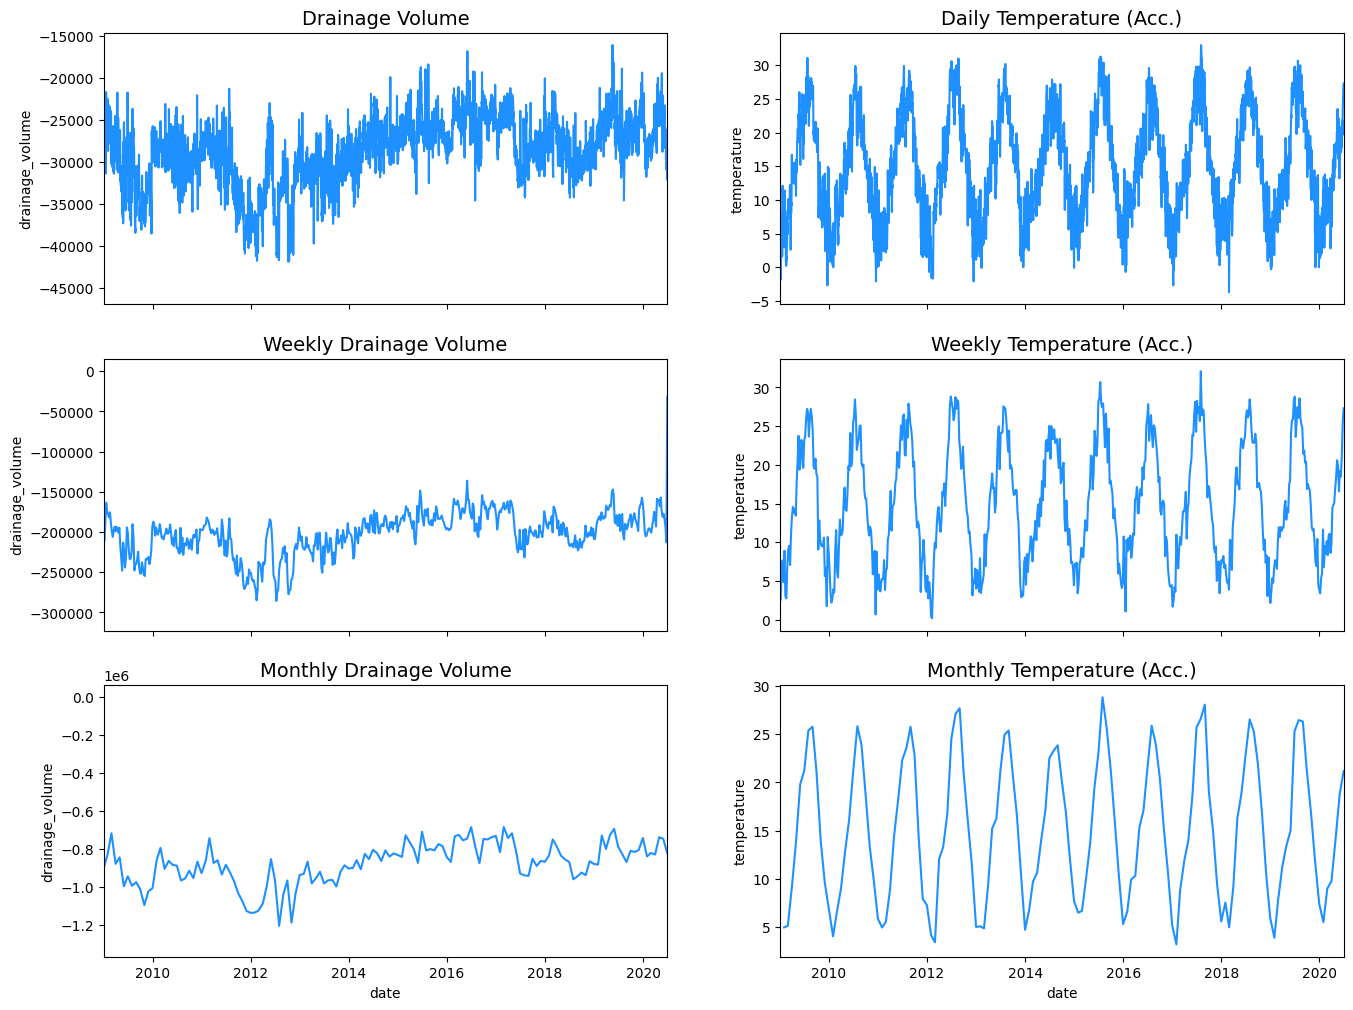

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=3, sharex=True, figsize=(16,12))

sns.lineplot(data=df, x='date', y='drainage_volume', color='dodgerblue', ax=ax[0, 0])

ax[0, 0].set_title('Drainage Volume', fontsize=14)

resampled_df = df[['date','drainage_volume']].resample('7D', on='date').sum().reset_index(drop=False)
sns.lineplot(x=resampled_df['date'], y=resampled_df['drainage_volume'], color='dodgerblue', ax=ax[1, 0])
ax[1, 0].set_title('Weekly Drainage Volume', fontsize=14)

resampled_df = df[['date','drainage_volume']].resample('M', on='date').sum().reset_index(drop=False)
sns.lineplot(x=resampled_df['date'], y=resampled_df['drainage_volume'], color='dodgerblue', ax=ax[2, 0])
ax[2, 0].set_title('Monthly Drainage Volume', fontsize=14)

for i in range(3):
    ax[i, 0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

sns.lineplot(x=df['date'], y=df['temperature'], color='dodgerblue', ax=ax[0, 1])
ax[0, 1].set_title('Daily Temperature (Acc.)', fontsize=14)

resampled_df = df[['date','temperature']].resample('7D', on='date').mean().reset_index(drop=False)
sns.lineplot(x=resampled_df['date'], y=resampled_df['temperature'], color='dodgerblue', ax=ax[1, 1])
ax[1, 1].set_title('Weekly Temperature (Acc.)', fontsize=14)

resampled_df = df[['date','temperature']].resample('M', on='date').mean().reset_index(drop=False)
sns.lineplot(x=resampled_df['date'], y=resampled_df['temperature'], color='dodgerblue', ax=ax[2, 1])
ax[2, 1].set_title('Monthly Temperature (Acc.)', fontsize=14)

for i in range(3):
    ax[i, 1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
    
plt.show()


In [ ]:
downsample = df[['date',
                 'depth_to_groundwater', 
                 'temperature',
                 'drainage_volume', 
                 'river_hydrometry',
                 'rainfall'
                ]].resample('7D', on='date').mean().reset_index(drop=False)

df = downsample.copy()

In [ ]:
df.fillna(0, inplace=True)
df.head()

,date,depth_to_groundwater,temperature,drainage_volume,river_hydrometry,rainfall
0,2006-03-14,-22.054286,0.0,0.0,0.0,0.0
1,2006-03-21,-21.847143,0.0,0.0,0.0,0.0
2,2006-03-28,-21.840000,0.0,0.0,0.0,0.0
3,2006-04-04,-21.744286,0.0,0.0,0.0,0.0
4,2006-04-11,-21.440000,0.0,0.0,0.0,0.0


## Check for stationarity

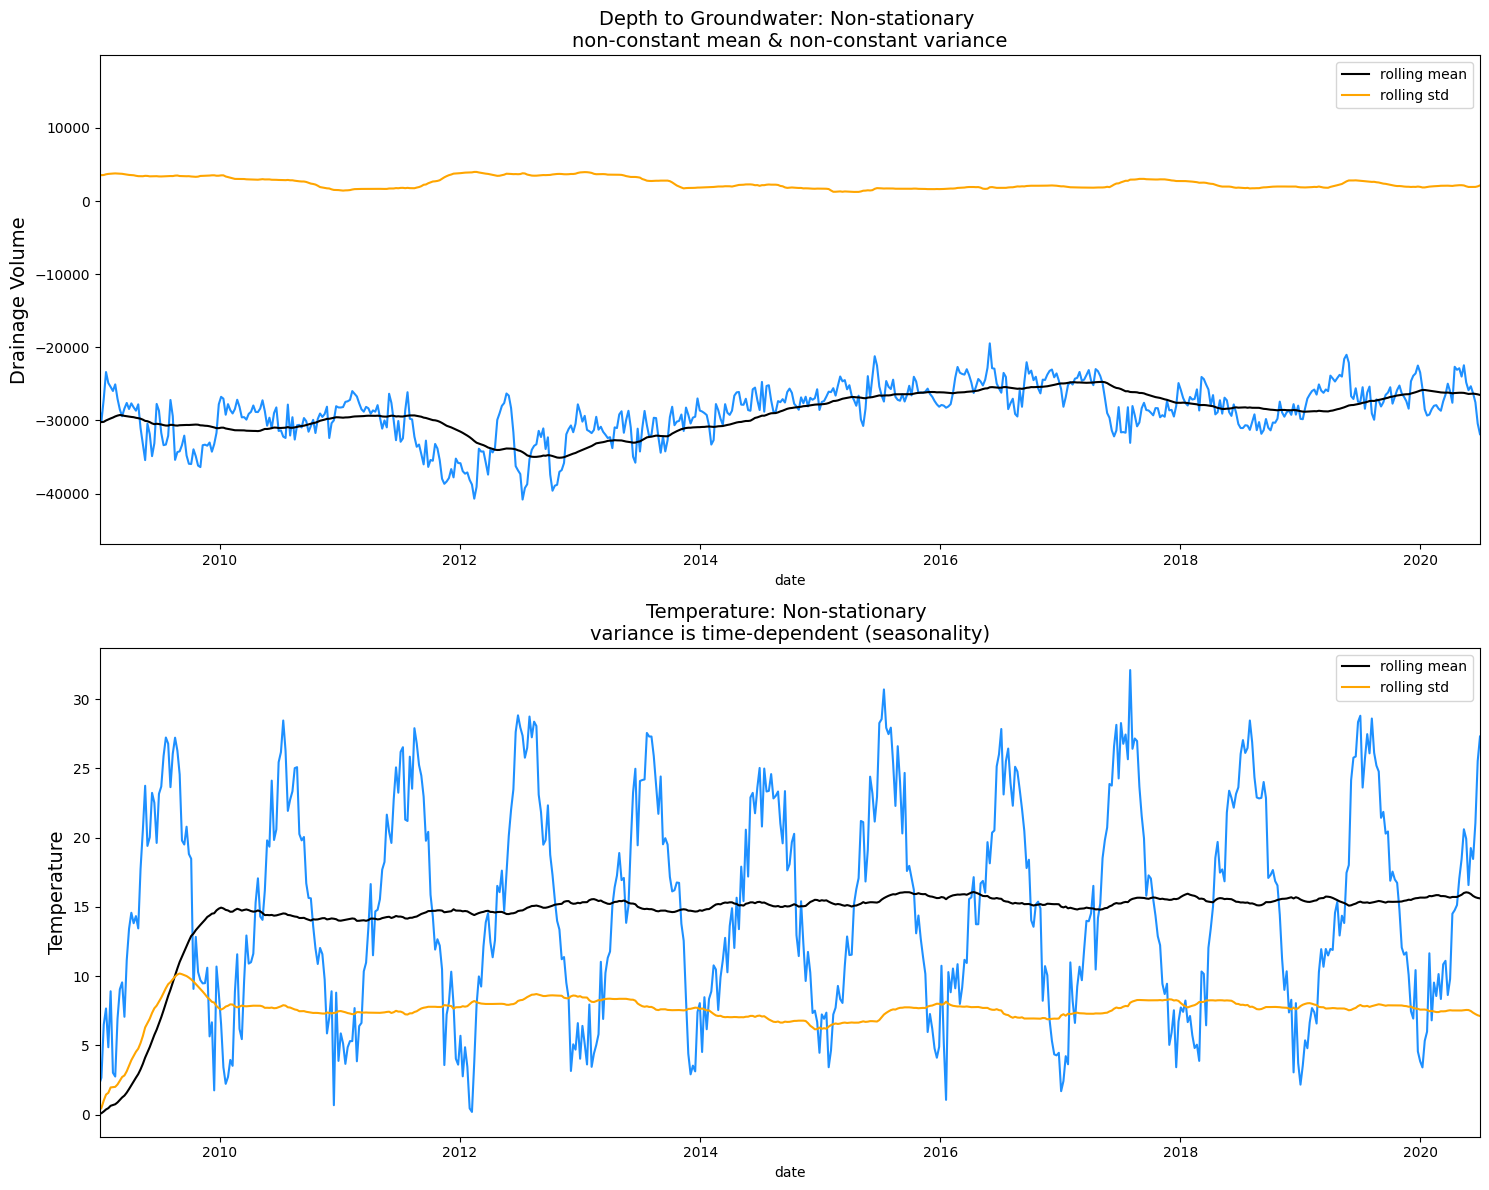

In [ ]:
rolling_window = 52
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

sns.lineplot(x=df['date'], y=df['drainage_volume'], ax=ax[0], color='dodgerblue')
sns.lineplot(x=df['date'], y=df['drainage_volume'].rolling(rolling_window).mean(), ax=ax[0], color='black', label='rolling mean')
sns.lineplot(x=df['date'], y=df['drainage_volume'].rolling(rolling_window).std(), ax=ax[0], color='orange', label='rolling std')
ax[0].set_title('Depth to Groundwater: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[0].set_ylabel(ylabel='Drainage Volume', fontsize=14)
ax[0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

sns.lineplot(x=df['date'], y=df['temperature'], ax=ax[1], color='dodgerblue')
sns.lineplot(x=df['date'], y=df['temperature'].rolling(rolling_window).mean(), ax=ax[1], color='black', label='rolling mean')
sns.lineplot(x=df['date'], y=df['temperature'].rolling(rolling_window).std(), ax=ax[1], color='orange', label='rolling std')
ax[1].set_title('Temperature: Non-stationary \nvariance is time-dependent (seasonality)', fontsize=14)
ax[1].set_ylabel(ylabel='Temperature', fontsize=14)
ax[1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

plt.tight_layout()
plt.show()

## Use of ADFuller test

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['depth_to_groundwater'].values)
result

(-3.2771678617212534,
 0.01593043487599103,
 4,
 742,
 {'1%': -3.4391937559530965,
  '5%': -2.8654430713273373,
  '10%': -2.568848417404698},
 -954.3259236873848)

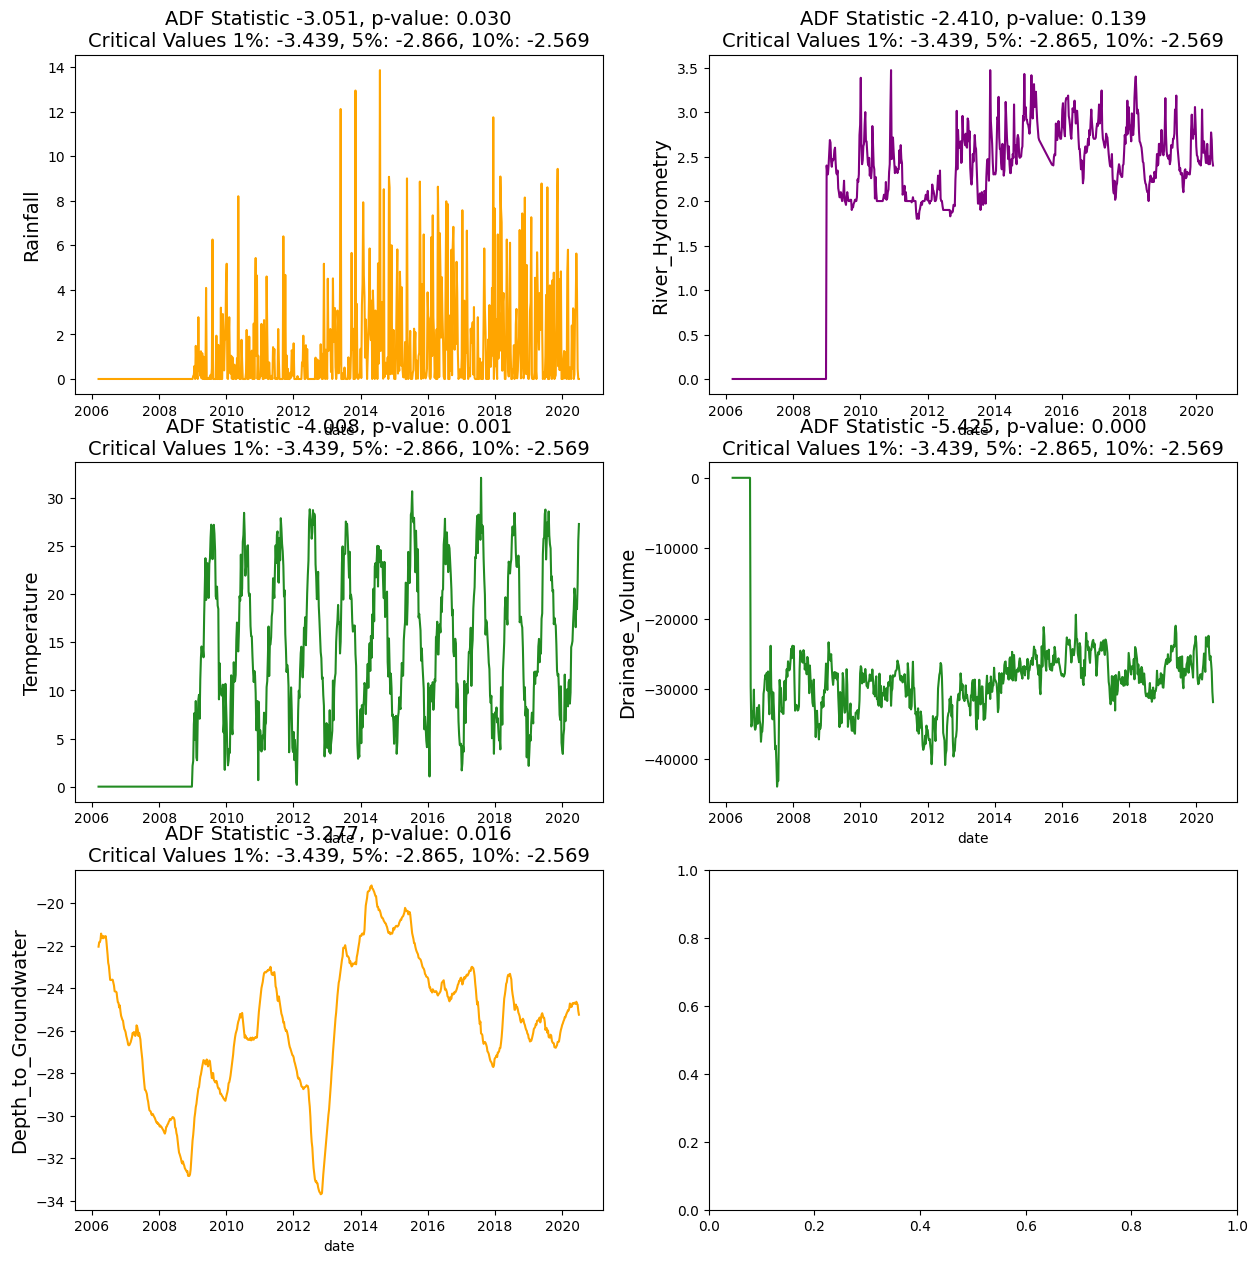

In [ ]:
f, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'orange'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'red'
    else:
        linecolor = 'purple'
    sns.lineplot(x=df['date'], y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

visualize_adfuller_results(df['rainfall'].values, 'Rainfall', ax[0, 0])
visualize_adfuller_results(df['temperature'].values, 'Temperature', ax[1, 0])
visualize_adfuller_results(df['river_hydrometry'].values, 'River_Hydrometry', ax[0, 1])
visualize_adfuller_results(df['drainage_volume'].values, 'Drainage_Volume', ax[1, 1])
visualize_adfuller_results(df['depth_to_groundwater'].values, 'Depth_to_Groundwater', ax[2, 0])

In [ ]:
print(result)

(-3.2771678617212534, 0.01593043487599103, 4, 742, {'1%': -3.4391937559530965, '5%': -2.8654430713273373, '10%': -2.568848417404698}, -954.3259236873848)


#### AS the underlying data is not-stationary , we need to transform data to stationary.

* Transformation
* Differencing

In [ ]:
df

,date,depth_to_groundwater,temperature,drainage_volume,river_hydrometry,rainfall
0,2006-03-14,-22.054286,0.000000,0.000000,0.000000,0.000000
1,2006-03-21,-21.847143,0.000000,0.000000,0.000000,0.000000
2,2006-03-28,-21.840000,0.000000,0.000000,0.000000,0.000000
3,2006-04-04,-21.744286,0.000000,0.000000,0.000000,0.000000
4,2006-04-11,-21.440000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
742,2020-06-02,-24.641429,19.242857,-25323.716571,2.514286,5.628571
743,2020-06-09,-24.734286,18.457143,-26292.445714,2.771429,3.914286
744,2020-06-16,-24.772857,21.057143,-27524.941714,2.685714,0.457143
745,2020-06-23,-25.067143,25.528571,-30425.760000,2.457143,0.000000


<Axes: xlabel='depth_to_groundwater_log', ylabel='Density'>

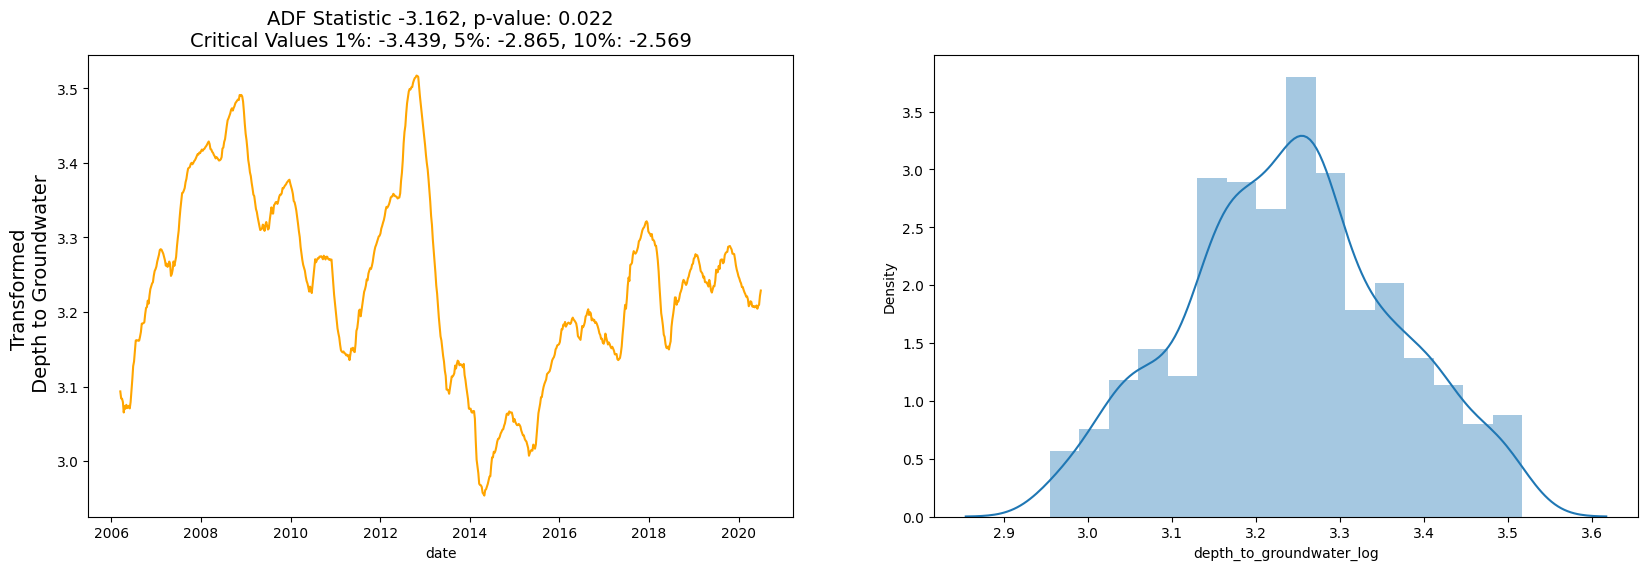

In [ ]:
# Let's transform the target variable first

# Log Transform of absolute values
# (Log transoform of negative values will return NaN)
df['depth_to_groundwater_log'] = np.log(abs(df['depth_to_groundwater']))

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
visualize_adfuller_results(df['depth_to_groundwater_log'], 'Transformed \n Depth to Groundwater', ax[0])

sns.distplot(df['depth_to_groundwater_log'], ax=ax[1])

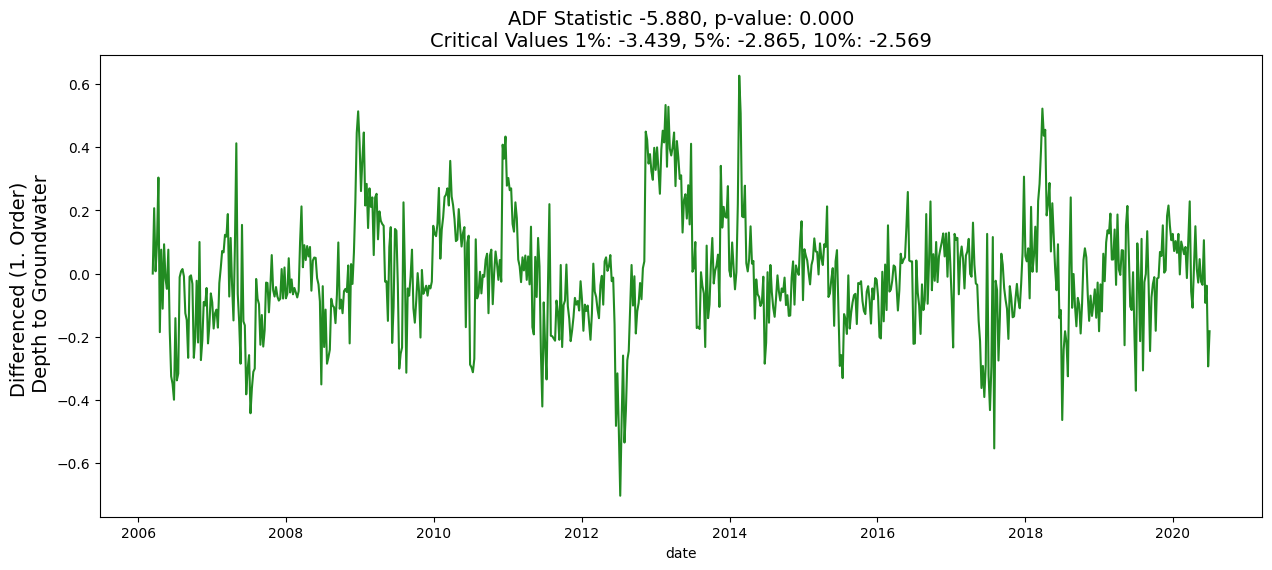

In [ ]:
# Still the ADF stats > critical value
# Let's try differentiating them

# First Order Differencing

ts_diff = np.diff(df['depth_to_groundwater'])
df['depth_to_groundwater_diff_1'] = np.append([0], ts_diff)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
visualize_adfuller_results(df['depth_to_groundwater_diff_1'], 'Differenced (1. Order) \n Depth to Groundwater', ax)

## Feature Engineering

In [ ]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day
df['day_of_year'] = pd.DatetimeIndex(df['date']).dayofyear
df['week_of_year'] = pd.DatetimeIndex(df['date']).weekofyear
df['quarter'] = pd.DatetimeIndex(df['date']).quarter
df['season'] = df['month'] % 12 // 3 + 1

df[['date', 'year', 'month', 'day', 'day_of_year', 'week_of_year', 'quarter', 'season']].head()

,date,year,month,day,day_of_year,week_of_year,quarter,season
0,2006-03-14,2006,3,14,73,11,1,2
1,2006-03-21,2006,3,21,80,12,1,2
2,2006-03-28,2006,3,28,87,13,1,2
3,2006-04-04,2006,4,4,94,14,2,2
4,2006-04-11,2006,4,11,101,15,2,2


Encoding cyclical features is a common technique used in feature engineering when dealing with time-related features like month, day of the week, or hour of the day. The reason for encoding these features is that they have a circular or periodic nature, which means that their values wrap around at certain points (e.g., months wrap around after December to January).

For example, consider the 'month' feature in the code snippet you provided. It has values from 1 to 12, representing the 12 months of the year. However, if we treat this feature as a regular numerical variable, the machine learning model may incorrectly assume that the distance between January and December is the same as the distance between February and March, which is not true.

To overcome this issue, we can encode cyclical features using trigonometric functions like sine and cosine. This transforms the feature into two new variables, each representing the sine and cosine of the angle between the value and the circle's x-axis. By doing so, we can represent the cyclical nature of the feature in a more meaningful way that respects its periodicity.

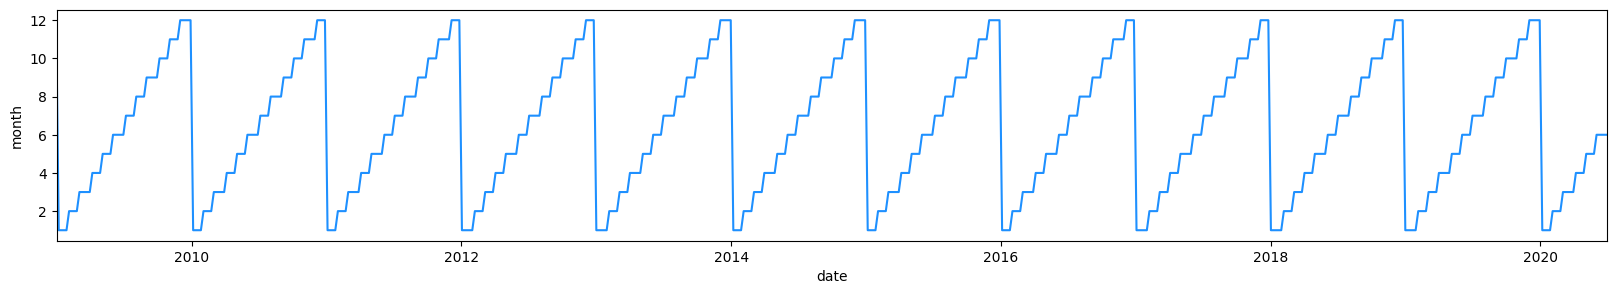

In [ ]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 3))

sns.lineplot(x=df['date'], y=df['month'], color='dodgerblue')
ax.set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
plt.show()

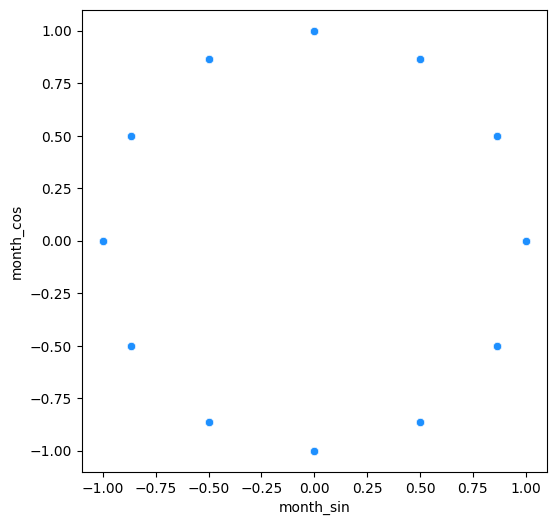

In [ ]:
month_in_year = 12
df['month_sin'] = np.sin(2*np.pi*df['month']/month_in_year)
df['month_cos'] = np.cos(2*np.pi*df['month']/month_in_year)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

sns.scatterplot(x=df.month_sin, y=df.month_cos, color='dodgerblue')
plt.show()

## Time Series Decomposition

Time series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise components.

These components are defined as follows:

Level: The average value in the series.
Trend: The increasing or decreasing value in the series.
Seasonality: The repeating short-term cycle in the series.
Noise: The random variation in the series.
Decomposition provides a useful abstract model for thinking about time series generally and for better understanding problems during time series analysis and forecasting.

All series have a level and noise. The trend and seasonality components are optional.

It is helpful to think of the components as combining either additively or multiplicatively:

Additive:  
y
(
t
)
=
L
e
v
e
l
+
T
r
e
n
d
+
S
e
a
s
o
n
a
l
i
t
y
+
N
o
i
s
e
 
Multiplicative:  
y
(
t
)
=
L
e
v
e
l
∗
T
r
e
n
d
∗
S
e
a
s
o
n
a
l
i
t
y
∗
N
o
i
s
e

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

core_columns =  [
    'rainfall', 'temperature', 'drainage_volume', 
    'river_hydrometry', 'depth_to_groundwater'
]

for column in core_columns:
    decomp = seasonal_decompose(df[column], period=52, model='additive', extrapolate_trend='freq')
    df[f"{column}_trend"] = decomp.trend
    df[f"{column}_seasonal"] = decomp.seasonal

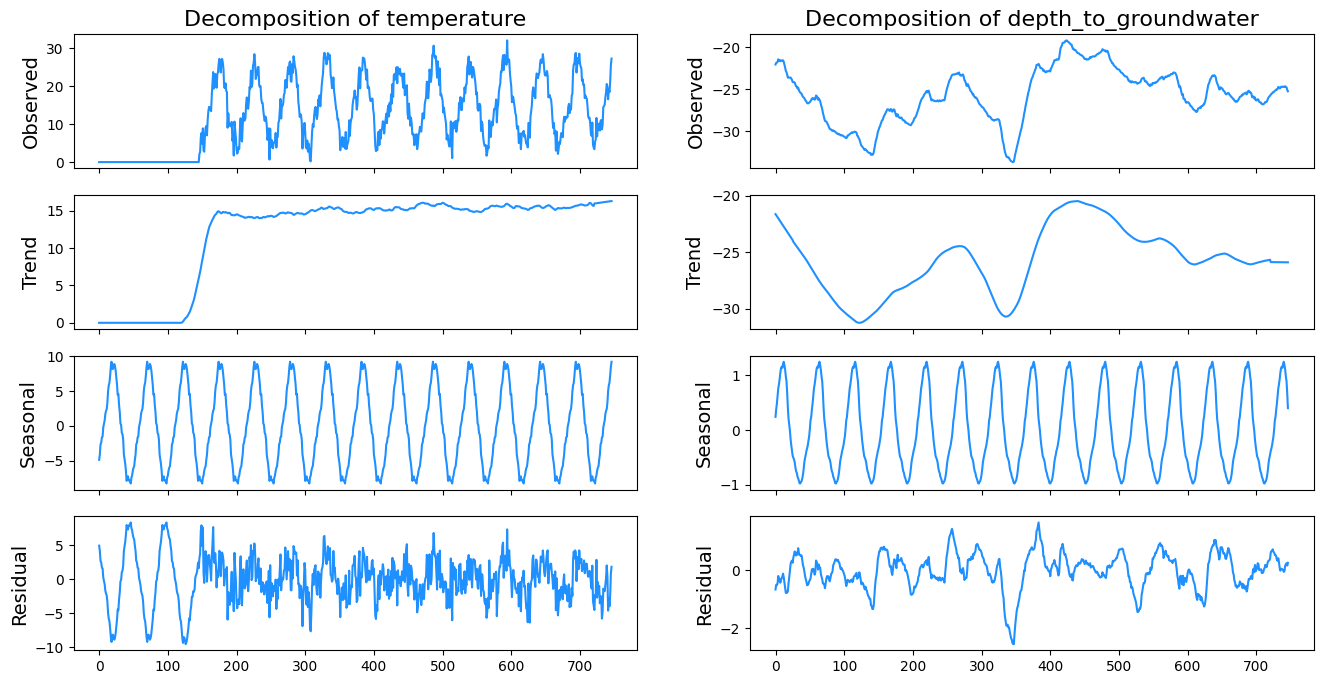

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,8))

for i, column in enumerate(['temperature', 'depth_to_groundwater']):
    
    res = seasonal_decompose(df[column], period=52, model='additive', extrapolate_trend='freq')

    ax[0,i].set_title('Decomposition of {}'.format(column), fontsize=16)
    res.observed.plot(ax=ax[0,i], legend=False, color='dodgerblue')
    ax[0,i].set_ylabel('Observed', fontsize=14)

    res.trend.plot(ax=ax[1,i], legend=False, color='dodgerblue')
    ax[1,i].set_ylabel('Trend', fontsize=14)

    res.seasonal.plot(ax=ax[2,i], legend=False, color='dodgerblue')
    ax[2,i].set_ylabel('Seasonal', fontsize=14)
    
    res.resid.plot(ax=ax[3,i], legend=False, color='dodgerblue')
    ax[3,i].set_ylabel('Residual', fontsize=14)

plt.show()

In [ ]:
weeks_in_month = 4

for column in core_columns:
    df[f'{column}_seasonal_shift_b_2m'] = df[f'{column}_seasonal'].shift(-2 * weeks_in_month)
    df[f'{column}_seasonal_shift_b_1m'] = df[f'{column}_seasonal'].shift(-1 * weeks_in_month)
    df[f'{column}_seasonal_shift_1m'] = df[f'{column}_seasonal'].shift(1 * weeks_in_month)
    df[f'{column}_seasonal_shift_2m'] = df[f'{column}_seasonal'].shift(2 * weeks_in_month)
    df[f'{column}_seasonal_shift_3m'] = df[f'{column}_seasonal'].shift(3 * weeks_in_month)

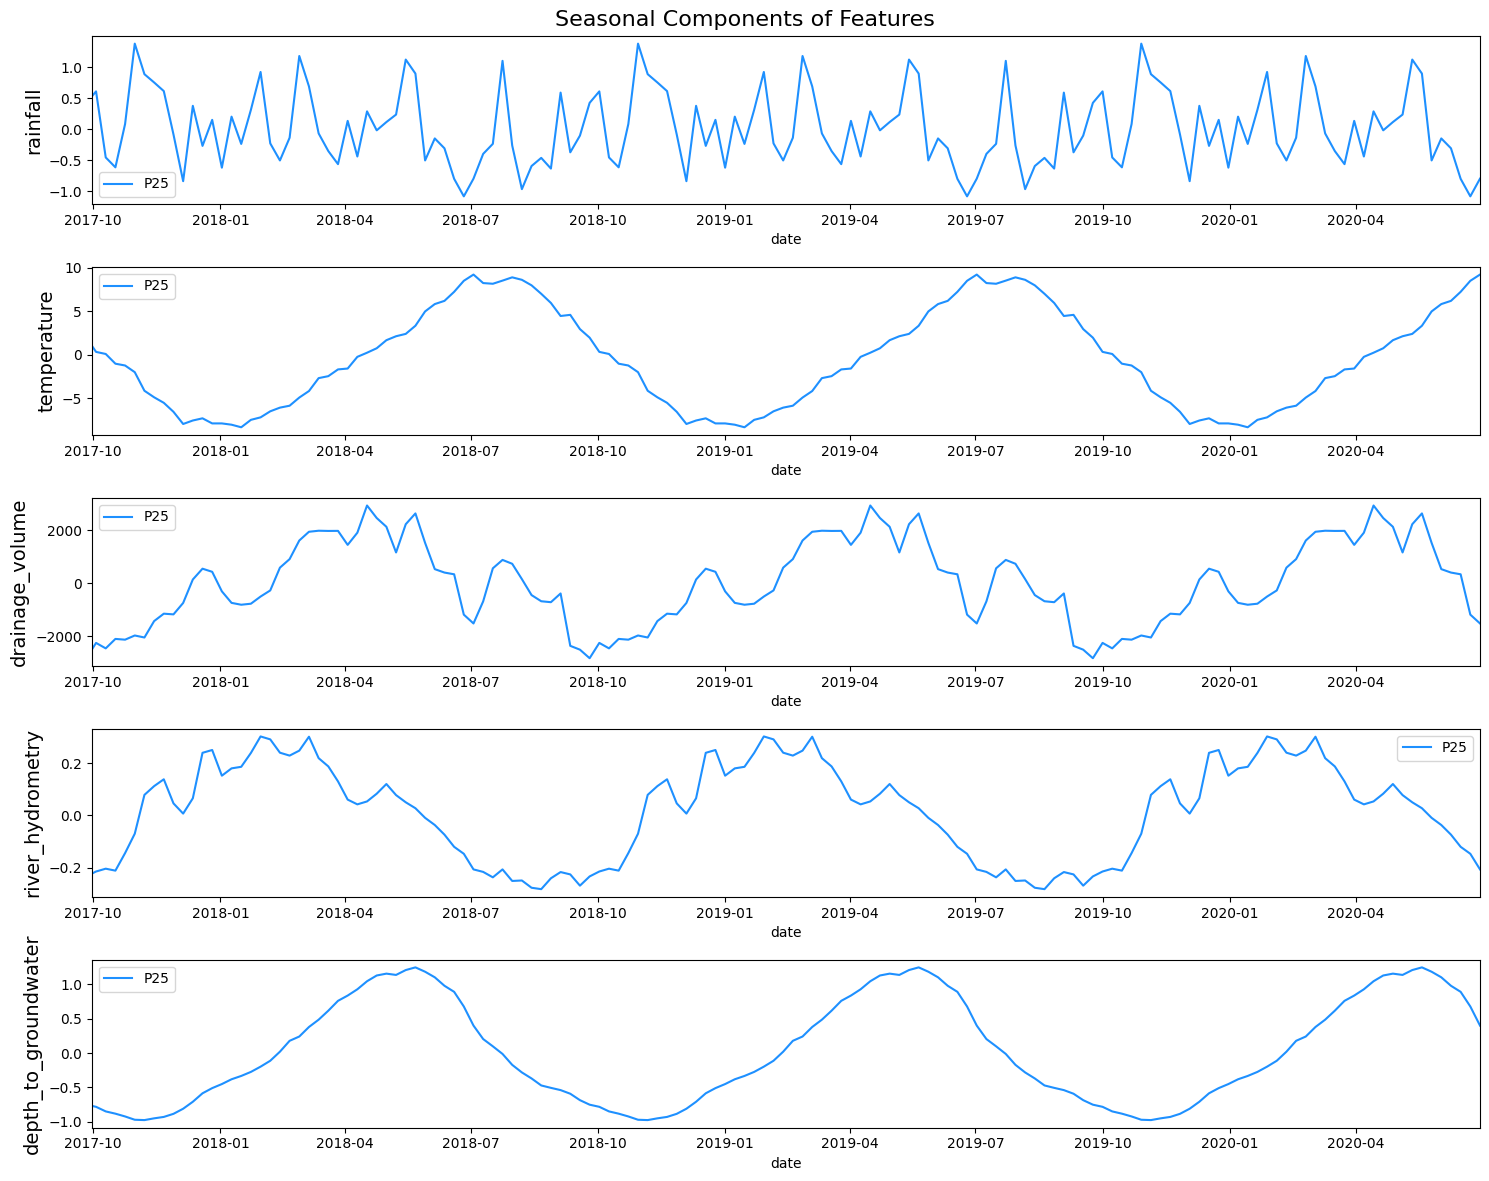

In [ ]:
## EDA to analyse the columns

f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 12))
f.suptitle('Seasonal Components of Features', fontsize=16)

for i, column in enumerate(core_columns):
    sns.lineplot(x=df['date'], y=df[column + '_seasonal'], ax=ax[i], color='dodgerblue', label='P25')
    ax[i].set_ylabel(ylabel=column, fontsize=14)
    ax[i].set_xlim([date(2017, 9, 30), date(2020, 6, 30)])
    
plt.tight_layout()
plt.show()

**depth_to_groundwater:** reaches its maximum around May/June and its minimum around November

**temperature:** reaches its maxmium around August and its minimum around January

**drainage_volume:** reaches its minimum around July.

**river_hydrometry:** reaches its maximum around February/March and its minimum around September

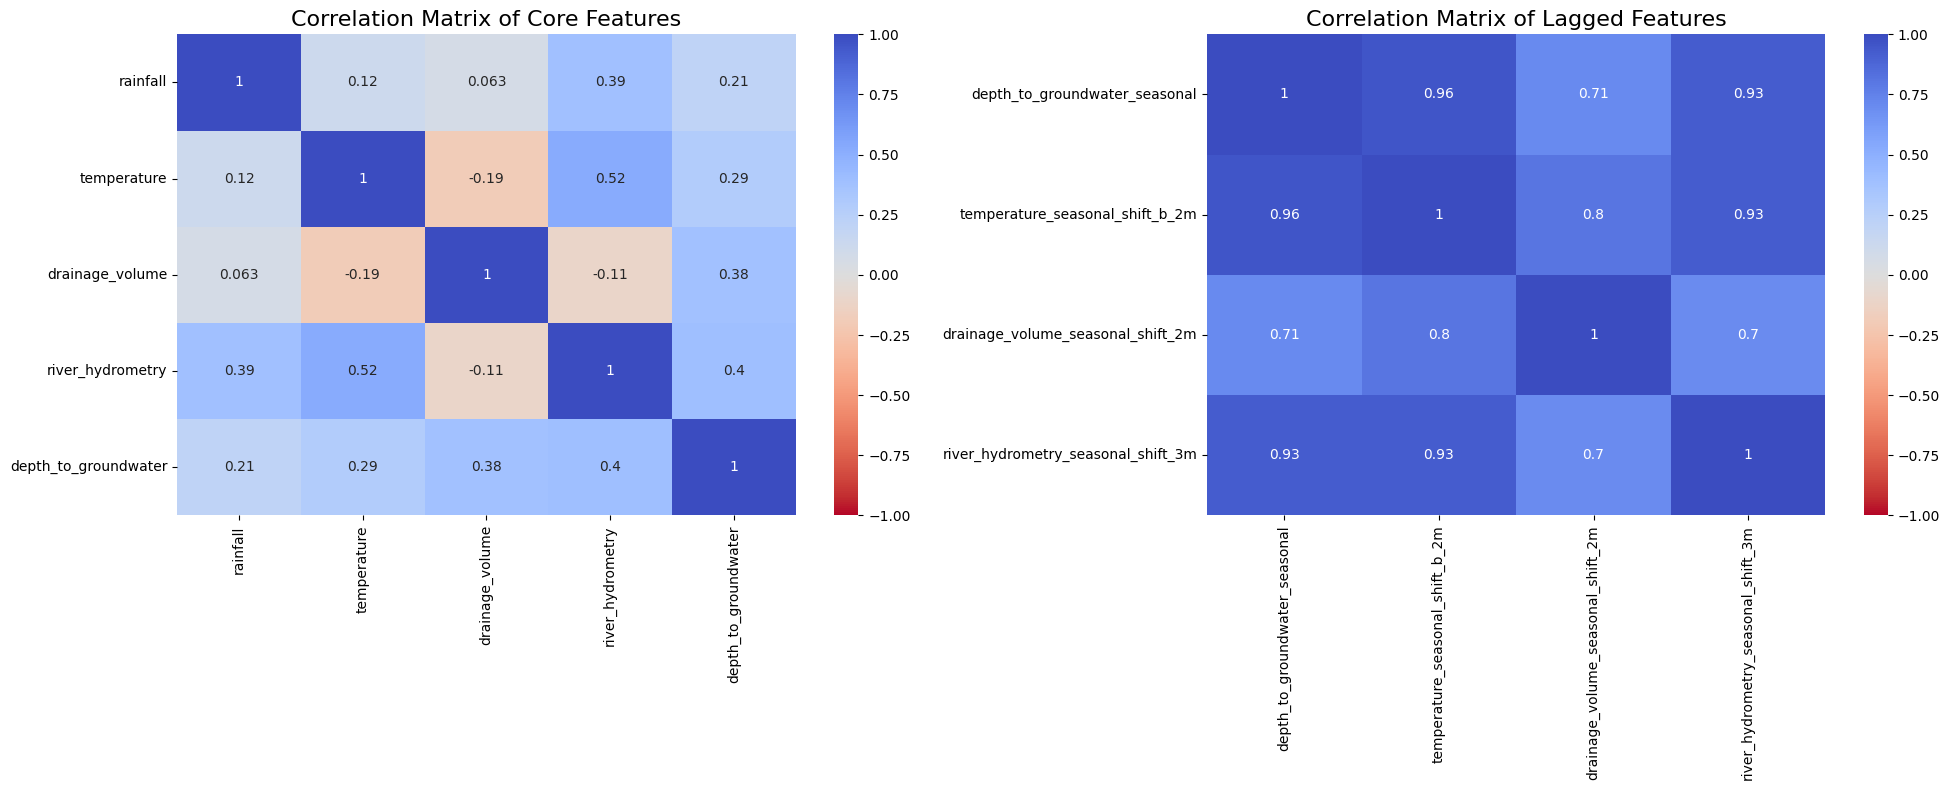

In [ ]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

corrmat = df[core_columns].corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[0])
ax[0].set_title('Correlation Matrix of Core Features', fontsize=16)

shifted_cols = [
    'depth_to_groundwater_seasonal',         
    'temperature_seasonal_shift_b_2m',
    'drainage_volume_seasonal_shift_2m', 
    'river_hydrometry_seasonal_shift_3m'
]
corrmat = df[shifted_cols].corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[1])
ax[1].set_title('Correlation Matrix of Lagged Features', fontsize=16)


plt.tight_layout()
plt.show()

## The features are higher correlated in the case of shifted features (lagged ones) than the original ones.

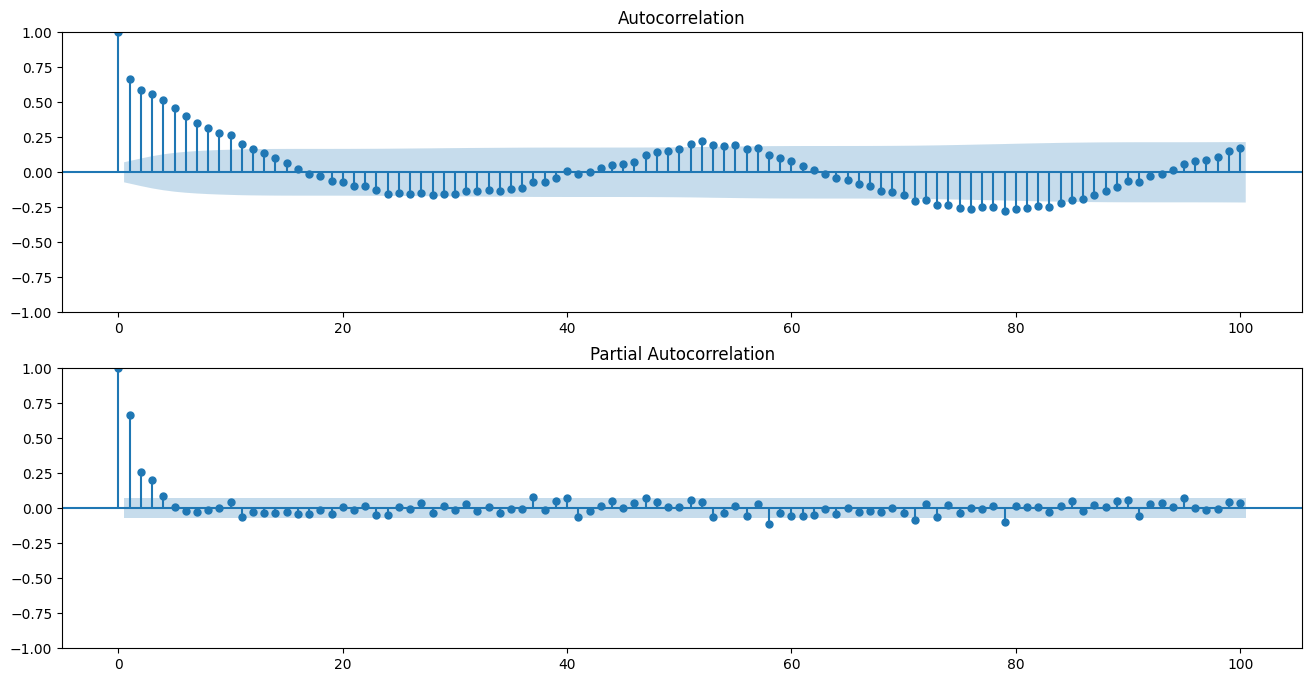

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(df['depth_to_groundwater_diff_1'], lags=100, ax=ax[0])
plot_pacf(df['depth_to_groundwater_diff_1'], lags=100, ax=ax[1])

plt.show()

The ACF plot shows the correlation of the series with itself at different lags. ACF plot can be used to identify the seasonal component of the series. The plot shows that there is a significant correlation with the past 12 lags, indicating that there is a seasonal component with a period of 12.

The PACF plot shows the partial correlation of the series with itself at different lags, after removing the effects of intervening lags. PACF plot can be used to identify the autoregressive (AR) component of the series. The plot shows a significant spike at lag 1 and 2, which indicates that the first and second order differences of the series may be needed to remove the autocorrelation.

## Model Building

In [ ]:
## Cross validation

from sklearn.model_selection import TimeSeriesSplit

N_SPLITS = 3

X = df['date']
y = df['depth_to_groundwater']

folds = TimeSeriesSplit(n_splits=N_SPLITS)

In [ ]:
folds

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None)

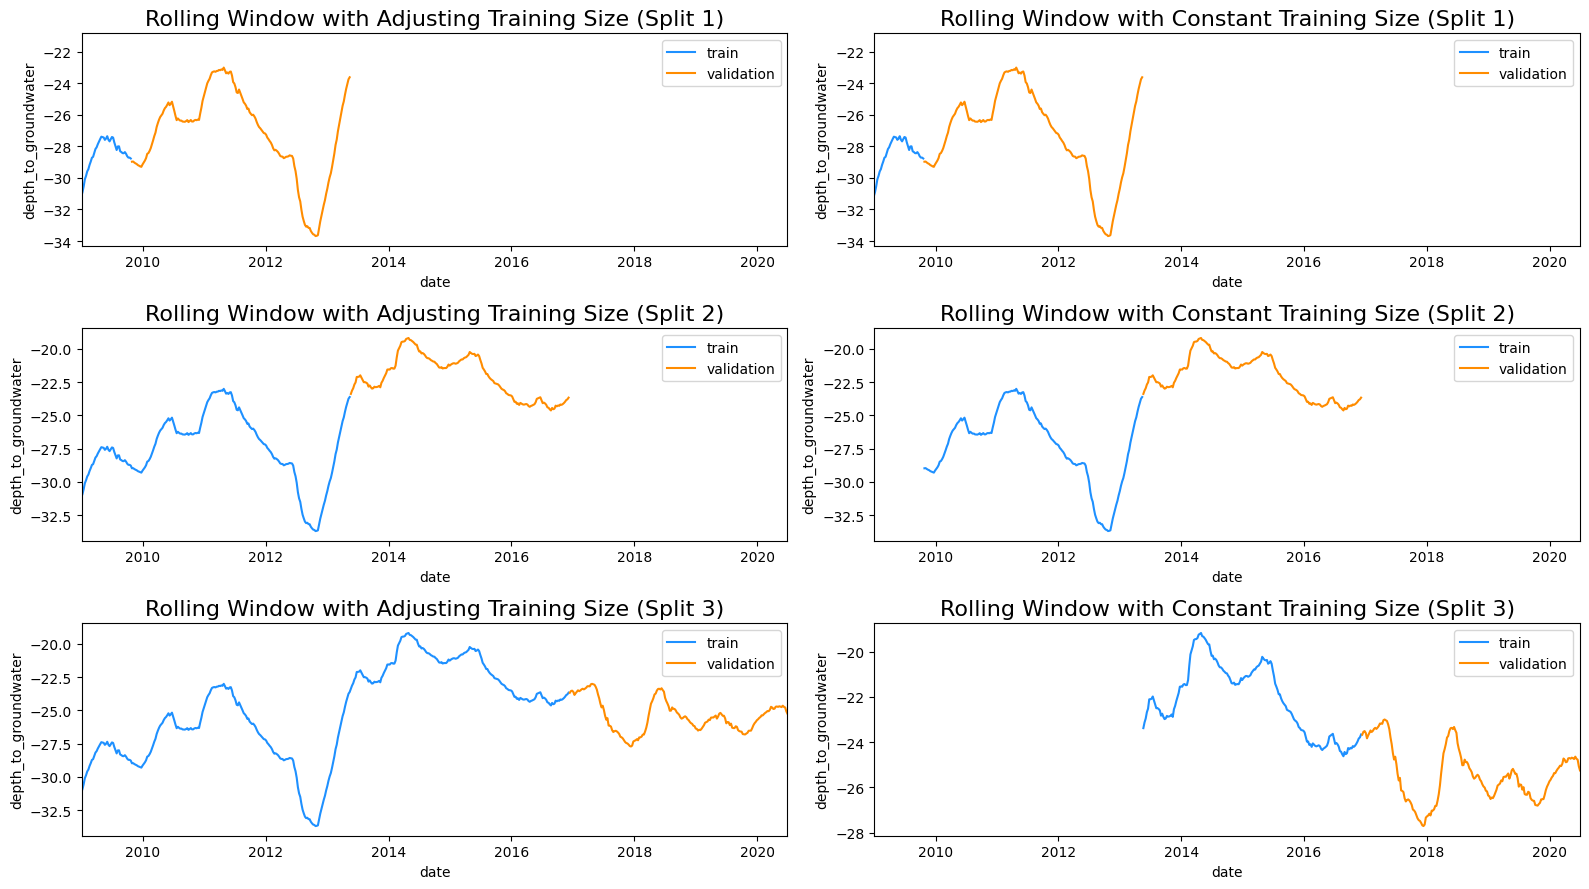

In [ ]:
f, ax = plt.subplots(nrows=N_SPLITS, ncols=2, figsize=(16, 9))

for i, (train_index, valid_index) in enumerate(folds.split(X)):
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

    sns.lineplot(
        x=X_train, 
        y=y_train, 
        ax=ax[i,0], 
        color='dodgerblue', 
        label='train'
    )
    sns.lineplot(
        x=X_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
        y=y_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
        ax=ax[i,1], 
        color='dodgerblue', 
        label='train'
    )

    for j in range(2):
        sns.lineplot(x= X_valid, y= y_valid, ax=ax[i, j], color='darkorange', label='validation')
    ax[i, 0].set_title(f"Rolling Window with Adjusting Training Size (Split {i+1})", fontsize=16)
    ax[i, 1].set_title(f"Rolling Window with Constant Training Size (Split {i+1})", fontsize=16)

for i in range(N_SPLITS):
    ax[i, 0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
    ax[i, 1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
    
plt.tight_layout()
plt.show()

In [ ]:
train_size = int(0.85 * len(df))
test_size = len(df) - train_size

univariate_df = df[['date', 'depth_to_groundwater']].copy()
univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

print(len(train), len(x_valid))
print(len(y_valid))

634 113
113


## FBPROPHET

In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

from prophet import Prophet


# Train the model
model = Prophet()
model.fit(train)

x_valid = model.make_future_dataframe(periods=30, freq='w')

# Predict on valid set
y_pred = model.predict(x_valid)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred.tail(test_size)['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred.tail(test_size)['yhat']))

print('RMSE: {}'.format(score_rmse))

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpawv24zoz/krl6302x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpawv24zoz/m1znmc9d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57060', 'data', 'file=/tmp/tmpawv24zoz/krl6302x.json', 'init=/tmp/tmpawv24zoz/m1znmc9d.json', 'output', 'file=/tmp/tmpawv24zoz/prophet_modelpvrg3va8/prophet_model-20230418164222.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:42:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:42:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 1.6384659528050787


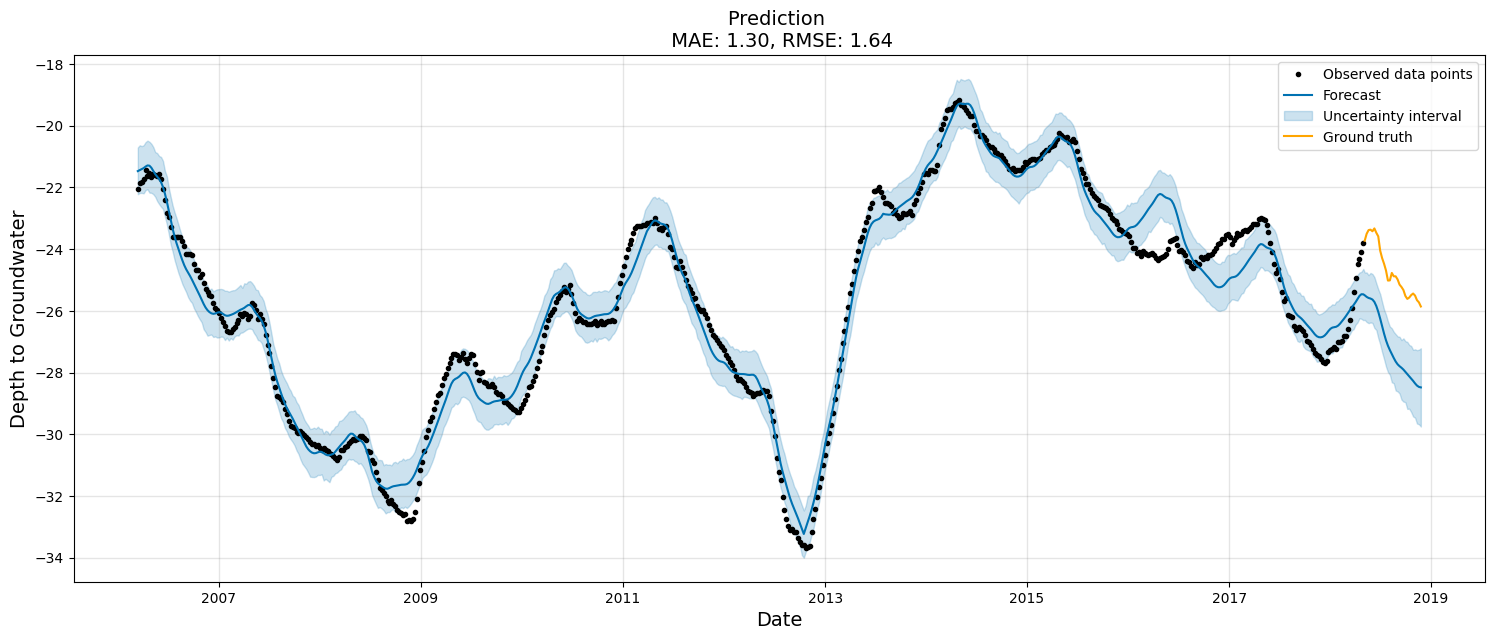

In [ ]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model.plot(y_pred, ax=ax)
sns.lineplot(x=x_valid['ds'], y=y_valid['y'], ax=ax, color='orange', label='Ground truth')

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

plt.show()

## ARIMA MODEL

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
# Fit model
model = sm.tsa.arima.ARIMA(y_train, order=(2,0,0))
model_fit = model.fit()

# Prediction with ARIMA
y_pred = model_fit.forecast(len(y_valid))

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred)
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred))

print('RMSE: {}'.format(score_rmse))

RMSE: 1.8357761885455173


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# f, ax = plt.subplots(1)
# f.set_figheight(4)
# f.set_figwidth(15)

# sns.lineplot(x=x_valid.index, y=y_pred, ax=ax, color='blue', label='predicted')
# sns.lineplot(x=x_valid.index, y=y_valid['y'], ax=ax, color='orange', label='Ground truth')

# ax.set_xlabel(xlabel='Date', fontsize=14)
# ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

# plt.show()

## Python Module for ARIMA

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.5 MB/s eta 0:00:00


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(y_train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-553.564, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5931.098, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.20 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-797.588, Time=0.19 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-796.099, Time=0.62 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-796.262, Time=1.11 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-631.157, Time=1.00 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.60 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-795.168, Time=1.57 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-807.900, Time=1.37 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-556.433, Time=0.27 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-804.645, Time=1

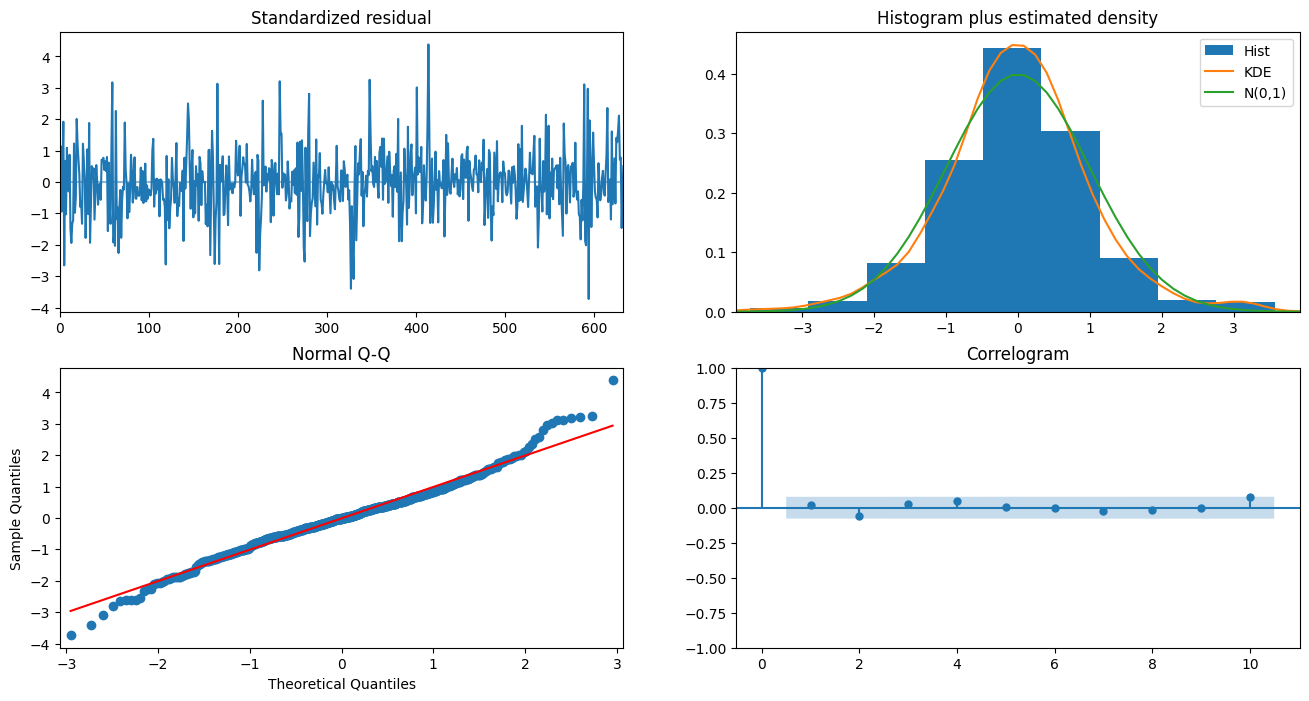

In [ ]:
model.plot_diagnostics(figsize=(16,8))
plt.show()